**loading libraries**

In [ ]:
# importing pandas
import pandas as pd

# Import numpy
import numpy as np

# Import math
import math

# Import matplotlib
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

# Importt scipy.stat
import scipy.stats as stats

# importing norm from scipy stats
from scipy.stats import norm

**Loading the Datasets**

In [ ]:
#load column explanation dataset
columns_explanation = pd.read_excel("/content/columns_explanation.xlsx")
columns_explanation

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
#loading autolib dataset
autolib = pd.read_csv("/content/autolib_daily_events_postal_code.csv")
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


**Previewing Dataset**

In [ ]:
#preview first five rows 
autolib.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#previewing last five rows
autolib.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#data information
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
#Data Description
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
autolib.mean().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


90547.28921355298

In [ ]:
#Shape of the dataset
autolib.shape

(16085, 13)

In [ ]:
#columns of the dataset
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
#dropping columns
autolib = autolib.drop(columns=['BlueCars_returned_sum','Utilib_returned_sum','Utilib_14_returned_sum'])


In [ ]:
# Checking whether each column has an appropriate datatype
autolib.dtypes

Postal code             int64
date                   object
n_daily_data_points     int64
dayOfWeek               int64
day_type               object
BlueCars_taken_sum      int64
Utilib_taken_sum        int64
Utilib_14_taken_sum     int64
Slots_freed_sum         int64
Slots_taken_sum         int64
dtype: object

In [ ]:
# Determining the no. of records in our dataset
#
autolib.count()

Postal code            16085
date                   16085
n_daily_data_points    16085
dayOfWeek              16085
day_type               16085
BlueCars_taken_sum     16085
Utilib_taken_sum       16085
Utilib_14_taken_sum    16085
Slots_freed_sum        16085
Slots_taken_sum        16085
dtype: int64

**Cleaning the Dataset**


**Checking and removing null values of any**

In [ ]:
#checking for null values
autolib.isnull().sum()

Postal code            0
date                   0
n_daily_data_points    0
dayOfWeek              0
day_type               0
BlueCars_taken_sum     0
Utilib_taken_sum       0
Utilib_14_taken_sum    0
Slots_freed_sum        0
Slots_taken_sum        0
dtype: int64

the dataset contains no null values

**Checking for Duplicates**

In [ ]:
#checking duplicates
autolib.duplicated().sum()
#no duplicates found

0

##Checking for Outliers

In [ ]:
autolib.shape

(16085, 10)

In [ ]:
# adding index column
autolib['index1'] = autolib.index

# Dropping columns with string data ('Postal code', 'day_type', 'date') to allow the dropping of outliers
df = autolib.drop(['Postal code', 'day_type', 'date'], axis=1)

# Removing outliers
autolib_df1 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# Size of df dataframe after outliers removed
autolib_df1.shape


(14942, 8)

In [ ]:
# Creating dataframe with removed string data to join later with df dataframe 
# after outliers removed
postal = autolib[['Postal code','date', 'day_type', 'index1']]

# Returning the data on postal codes dates and 
# joining dataframes on index
autolib_final = pd.merge(postal,autolib_df1,on='index1')


#dropping index1 column
autolib_final = autolib_final.drop(['index1'], axis=1)
autolib_final

,Postal code,date,day_type,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,Utilib_taken_sum,Utilib_14_taken_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,weekday,1440,0,110,3,10,22,20
1,75001,1/2/2018,weekday,1438,1,98,1,8,23,22
2,75001,1/3/2018,weekday,1439,2,138,0,2,27,27
3,75001,1/5/2018,weekday,1440,4,114,3,6,18,20
4,75001,1/6/2018,weekend,1437,5,187,6,7,38,35
...,...,...,...,...,...,...,...,...,...,...
14937,95880,6/15/2018,weekday,1440,4,15,0,2,0,0
14938,95880,6/16/2018,weekend,1440,5,19,0,2,0,0
14939,95880,6/17/2018,weekend,1440,6,33,1,0,0,0
14940,95880,6/18/2018,weekday,1440,0,11,3,2,0,0


##Checking for Anomalies

In [ ]:
# Checking for Anomalies

q1_3, q3_3 = np.percentile(autolib_final['BlueCars_taken_sum'], [25, 75]) 

iqr = q3_3 - q1_3

l_bound = q1_3 - (1.5*iqr)
u_bound = q3_3 + (1.5 * iqr)


print(iqr)

91.0


**Univariate Analysis**

plotting histographs and Bar graphs

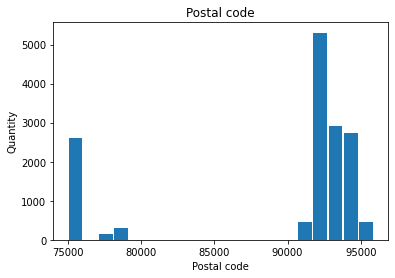

In [ ]:
#histograph for postal code
Postal_code = autolib_final['Postal code']

plt.hist(Postal_code, bins=20, histtype='bar', rwidth=0.9)
plt.xlabel('Postal code')
plt.ylabel('Quantity')
plt.title('Postal code')
plt.show()

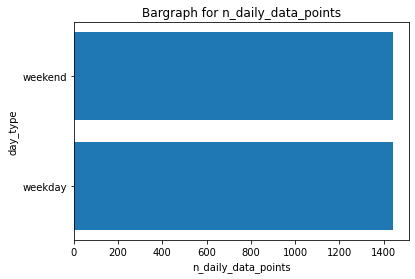

In [ ]:
#Bargraph for n_daily_data_points
n_daily_data_points = autolib_final['n_daily_data_points']
day_type  = autolib_final['day_type']

plt.barh(day_type,n_daily_data_points)
plt.xlabel('n_daily_data_points')
plt.ylabel('day_type')
plt.title('Bargraph for n_daily_data_points')
plt.show()

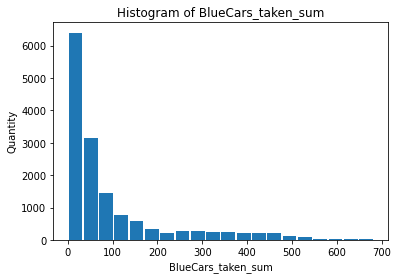

In [ ]:
#histograph for BlueCars_taken_sum 
BlueCars_taken_sum  = autolib_final['BlueCars_taken_sum']

plt.hist(BlueCars_taken_sum , bins=20, histtype='bar', rwidth=0.9)
plt.xlabel('BlueCars_taken_sum')
plt.ylabel('Quantity')
plt.title('Histogram of BlueCars_taken_sum')
plt.show()

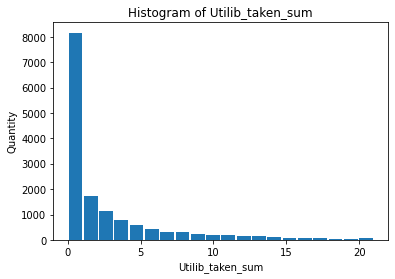

In [ ]:
#histograph for  Utilib_taken_sum 
Utilib_taken_sum  = autolib_final['Utilib_taken_sum']

plt.hist(Utilib_taken_sum , bins=20, histtype='bar', rwidth=0.9)
plt.xlabel('Utilib_taken_sum')
plt.ylabel('Quantity')
plt.title('Histogram of Utilib_taken_sum')
plt.show()

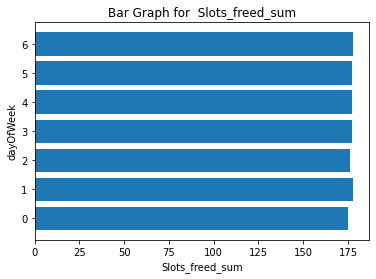

In [ ]:
#Bar Graph for  Slots_freed_sum
Slots_freed_sum  = autolib_final['Slots_freed_sum']
dayOfWeek  = autolib_final['dayOfWeek']

plt.barh(dayOfWeek,Slots_freed_sum)
plt.xlabel('Slots_freed_sum')
plt.ylabel('dayOfWeek')
plt.title('Bar Graph for  Slots_freed_sum')
plt.show()

**Numeric Variables**

Measure of Central Tendancy

finding mean

In [ ]:

#finding mean of BlueCars_taken_sum
autolib_final['BlueCars_taken_sum'].mean()


96.71623611297015

finding median

In [ ]:
#finding median of BlueCars_taken_sum
autolib_final['BlueCars_taken_sum'].median()


43.0

finding mode

In [ ]:
#finding mode of BlueCars_taken_sum
autolib_final['BlueCars_taken_sum'].mode()


0    12
dtype: int64

**Measures of Dispersion/Variability/Spread**

**Standard Deviation**  

data points are spread out over a wider range of values since the standard deviation is high.

In [ ]:
#finding standard deviation of BlueCars_taken_sum
autolib_final['BlueCars_taken_sum'].std()

126.48595917210572

**Variance**
 the data has very large dis-similarities amongst its members since variance is high

In [ ]:
#finding variance of BlueCars_taken_sum
autolib_final['BlueCars_taken_sum'].var()

15998.697867687597

Range

In [ ]:
#finding Range of BlueCars_taken_sum
BlueCars_max = autolib_final['BlueCars_taken_sum'].max()
BlueCars_min = autolib_final['BlueCars_taken_sum'].min()

#range
BlueCars_max - BlueCars_min 

682

**Quantiles**

In [ ]:
autolib_final['BlueCars_taken_sum'].quantile([0.25,0.5,0.75])

0.25     19.0
0.50     43.0
0.75    110.0
Name: BlueCars_taken_sum, dtype: float64

**Skewness**

the distribution is positively skewed

In [ ]:
autolib_df1.skew()

n_daily_data_points   -4.006345
dayOfWeek              0.045028
BlueCars_taken_sum     1.983685
Utilib_taken_sum       2.052842
Utilib_14_taken_sum    2.017797
Slots_freed_sum        2.651993
Slots_taken_sum        2.658112
index1                -0.086805
dtype: float64

**Kurtosis**

 the distribution has heavier tails and is called a leptokurtic distribution.

In [ ]:
autolib_df1.kurt()

n_daily_data_points    15.889596
dayOfWeek              -1.273639
BlueCars_taken_sum      3.284525
Utilib_taken_sum        4.158441
Utilib_14_taken_sum     3.868765
Slots_freed_sum         6.007705
Slots_taken_sum         6.048449
index1                 -1.121505
dtype: float64

**Box Plot**

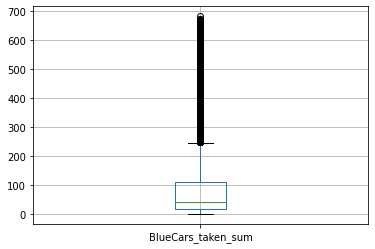

In [ ]:
autolib_final.boxplot(["BlueCars_taken_sum"])

##Bivariate Analysis

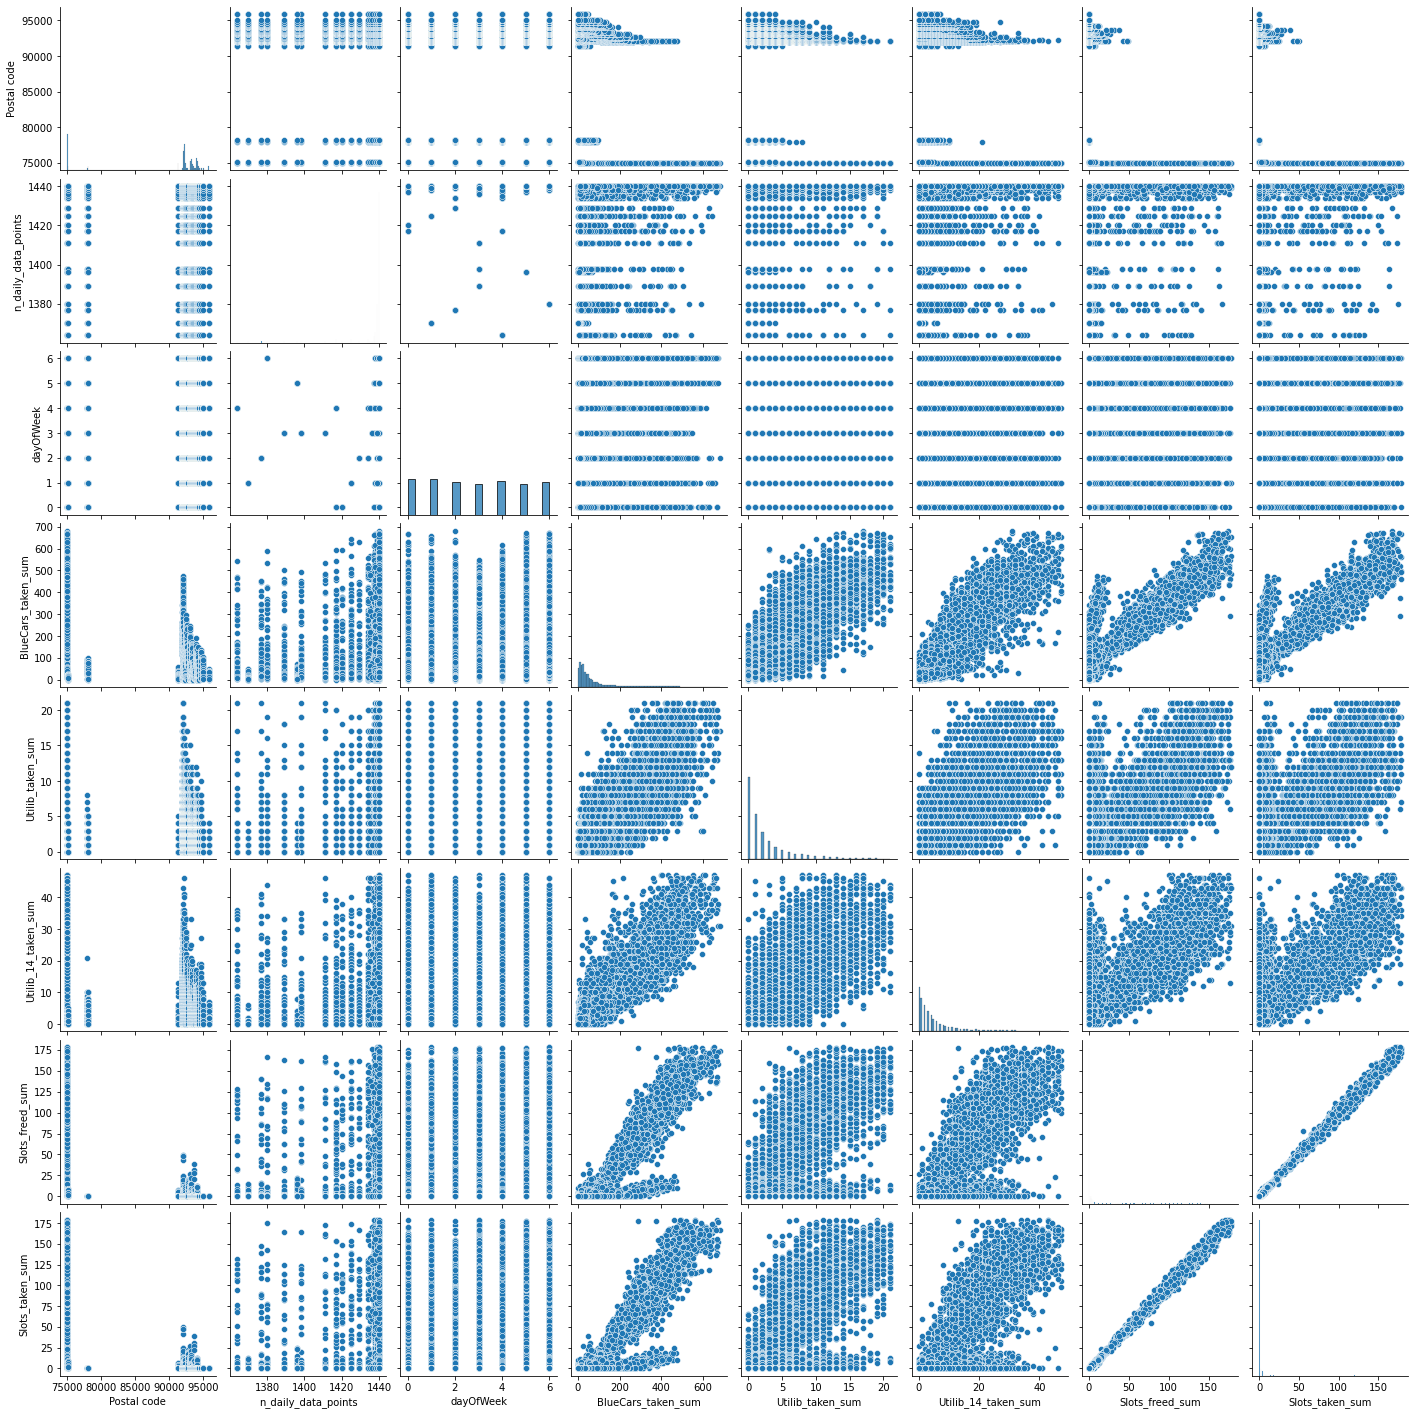

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(autolib_final)
plt.show()

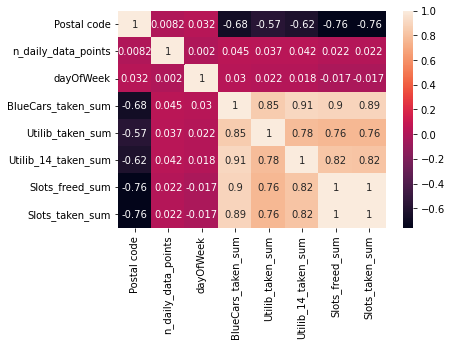

In [ ]:
#plotting heat maps to show the correlation
sns.heatmap(autolib_final.corr(),annot=True)
plt.show()

In [ ]:
#calculate the correlation between BlueCars and Utilib
autolib_final['BlueCars_taken_sum'].corr (autolib_final['Utilib_taken_sum'])
#BlueCars and autolib are strongly correlated

0.8519865833644866

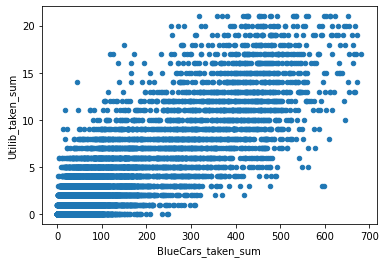

In [ ]:
#scatter graph to show the correlation
autolib_final.plot.scatter(x='BlueCars_taken_sum', y='Utilib_taken_sum')

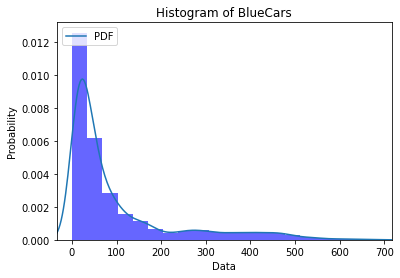

In [ ]:
#plotting a Histogram to show the distribution of bluecars
bluecars = autolib_final['BlueCars_taken_sum']

plt.hist(bluecars, bins=20, density=True, alpha=0.6, color='b')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)

kde = stats.gaussian_kde(bluecars)
# Generating a Kernel Density Estimate plot using Gaussian kernels.
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
# Placing a legend on the axes
plt.legend(loc="upper left")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.title("Histogram of BlueCars");  
plt.show()

##steps and assumptions

**assumptions**

- Data is nomally distributed

**Steps to be followed**

- specify null hypothesis
-  specify alternative hypothesis
-  setting the significant level
-  calculating the Test Statistic and corresponding P-value

 **conclusion**

 
we fail to reject the null hypothesis since the p-value is larger than the z-score

In [ ]:
#Null hypothesis
µ = 125
#Specific hypothesis
µ ≠ 125
#sifnificant level
α=0.05

In [ ]:
#Calculating the test statistic and corresponding p-value BlueCars_taken_sum
population_mean = 55
#significant level
α=0.05
mean = autolib_final['BlueCars_taken_sum'].mean()
mean
import statistics
sd = statistics.stdev(autolib_final['BlueCars_taken_sum'])
sd
# Calculating t statistic
z_score = (mean - population_mean) / sd
z_score
p=stats.norm.sf(abs(z_score)) * 2
print("Test statistic: ",z_score,"P-Value: ",p)

Test statistic:  0.3298092245654572 P-Value:  0.7415441168319368


##Training the model

In [ ]:
# Training the classifier:
#
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(autolib_df1, autolib_df1['Utilib_taken_sum'], test_size=0.1, random_state=69)
# Training the Model
# ---
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited:
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)
# Evaluating the Model
# ---
# Once we have put together our classifier, we can evaluate its performance in the testing set:
#
predicted = model.predict(X_test)

print(np.mean(predicted == y_test))

# Our simple Naive Bayes Classifier has 94.8% accuracy with this specific test set!


0.3010033444816054
